In [1]:
#!/usr/bin/env python3
import tables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def bin_data(reco_data, sim_data, bins, quant=68, logspace=True):
    """
    reco_data: energy distribution of reconstructed events or after cut. as np.array
    reco_data: energy distribution of reconstructed events or after cut. as np.array
    
    return: return the bin centers, and ratio of passing (triggers, reco, cut) to simulated.
    bins : Number of bins. Shoud be an interger not a list.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(reco_data)), np.log10(np.max(reco_data)), bins)
    else:
        bins = np.linspace(np.min(reco_data), np.max(reco_data), bins)

    hist1, bin_edges1 = np.histogram(reco_data, bins=bins)
    hist2, bin_edges2 = np.histogram(sim_data, bins=bins)
    ratio = np.divide(hist1, hist2, where=(hist2 !=0))
    
    print(f'# reco event: {hist1} events')
    print(f'# sim events: {hist2} events')
    print(f'# efficiency: {np.round(ratio, 3)} events')
    
    centers = (bins[1:] + bins[:-1]) / 2.0

    return (
        np.array(centers),
        np.array(ratio)
    )

In [16]:
sim_data = tables.open_file("C:/Users/brayd/Documents/sim0003_daq_data.hdf5")

    
reco_data = tables.open_file("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_sim0003_waterfits_tanGCD.hdf5")

In [17]:
sim_dict = {
    'event_id': sim_data.root.event_id.cols.value[:],

    'zenith_angle': np.degrees(sim_data.root.zenith_angle.cols.value[:]),
    #'numu_energy': file.root.numu_energy.cols.value[:],
    'muon_energy': sim_data.root.muon_energy.cols.value[:],
    
}

In [18]:
reco_dict = {
    'event_id': reco_data.root.event_id.cols.value[:],

    'angular_error_linefit' : np.degrees(reco_data.root.angular_error_linefit.cols.value[:]),
    'angular_error_mmsreco': np.degrees(reco_data.root.angular_error_LLHFit_mmsreco.cols.value[:]),
    'angular_error_splines_35ns': np.degrees(reco_data.root.angular_error_LLHFit_step1.cols.value[:]),
    'angular_error_splines_20ns': np.degrees(reco_data.root.angular_error_LLHFit_step2.cols.value[:]),
    'angular_error_splines_10ns': np.degrees(reco_data.root.angular_error_LLHFit_step3.cols.value[:]),
    'angular_error_splines_05ns': np.degrees(reco_data.root.angular_error_LLHFit_step4.cols.value[:]),

    'logl_splines_35ns': reco_data.root.logl_splines_35ns.cols.value[:],
    'logl_splines_20ns': reco_data.root.logl_splines_20ns.cols.value[:],
    'logl_splines_10ns': reco_data.root.logl_splines_10ns.cols.value[:],
    'logl_splines_05ns': reco_data.root.logl_splines_05ns.cols.value[:],
    'logl_mmsreco': reco_data.root.logl_mmsreco.cols.value[:],
    #'logl_mctruth': file.root.logl_mctruth.cols.value[:],
    'nchannels_count': reco_data.root.nchannels_count.cols.value[:],
    'qtotal_clean': reco_data.root.qtotal_clean.cols.value[:],
    'qtotal_unclean': reco_data.root.qtotal_unclean.cols.value[:],
    'nhits_clean': reco_data.root.nhits_clean.cols.value[:],
    'nhits_unclean': reco_data.root.nhits_unclean.cols.value[:],
    'zenith_angle': np.degrees(reco_data.root.zenith_angle.cols.value[:]),
    #'numu_energy': file.root.numu_energy.cols.value[:],
    'muon_energy': reco_data.root.muon_energy.cols.value[:],
    'dirTrackLengthA_reco': reco_data.root.track_length.cols.value[:]
}

In [20]:
df2 = pd.DataFrame(sim_dict)

df = pd.DataFrame(reco_dict)
df

,event_id,angular_error_linefit,angular_error_mmsreco,angular_error_splines_35ns,angular_error_splines_20ns,angular_error_splines_10ns,angular_error_splines_05ns,logl_splines_35ns,logl_splines_20ns,logl_splines_10ns,logl_splines_05ns,logl_mmsreco,nchannels_count,qtotal_clean,qtotal_unclean,nhits_clean,nhits_unclean,zenith_angle,muon_energy,dirTrackLengthA_reco
0,4.0,10.630999,3.780717,16.578620,6.534960,3.898216,3.447222,96.449836,94.420440,91.555126,88.767360,85.589948,10.0,21.099368,349.889436,17.0,343.0,8.413863,248562.808734,203.502377
1,5.0,23.802433,13.054380,11.629256,11.015828,11.407272,12.666910,205.063939,197.209098,188.873337,179.799923,168.391154,9.0,58.030653,360.598993,37.0,337.0,126.032360,82413.121514,219.620025
2,6.0,1.103711,0.072708,0.107634,0.080086,0.077178,0.087853,1686.199309,1600.866474,1520.271795,1460.514136,1419.957428,64.0,1374.572044,1740.365478,310.0,679.0,154.750350,365439.630861,1094.142508
3,7.0,3.312145,0.299986,1.123202,1.187444,0.579767,0.318701,4962.046223,4849.519977,4703.574280,4606.481551,4535.640151,65.0,4724.690979,5117.854588,835.0,1223.0,149.439931,655805.953845,533.858671
4,9.0,72.193976,69.030265,66.907806,67.837912,68.498458,68.787552,339.368524,331.458201,322.093497,313.652530,301.731029,9.0,320.362385,641.142619,43.0,355.0,59.173827,127512.595092,89.477352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60268,96.0,32.885100,37.200290,33.976917,39.145013,37.051650,37.103444,117.522047,115.593400,114.526030,114.322291,111.386310,7.0,18.081223,339.987492,15.0,331.0,109.342166,8179.430736,143.998120
60269,97.0,2.627796,0.032363,0.169646,0.051507,0.115319,0.085739,1494.875568,1434.924489,1375.040310,1345.819076,1350.583949,50.0,648.448142,999.400567,263.0,615.0,35.222585,382274.979696,1223.603537
60270,98.0,11.866534,5.077193,6.837881,6.179283,6.540362,5.461677,950.777332,908.087929,862.317932,820.316226,770.215732,27.0,729.819884,1075.780450,170.0,518.0,72.427484,392414.942795,452.328065
60271,99.0,42.040067,27.488747,30.444853,29.570988,29.218535,27.587306,1246.387780,1213.359107,1194.595609,1170.807400,1151.427513,37.0,940.055904,1280.740083,212.0,555.0,133.037097,622105.457915,358.237949


In [34]:
df.describe()

,event_id,angular_error_linefit,angular_error_mmsreco,angular_error_splines_35ns,angular_error_splines_20ns,angular_error_splines_10ns,angular_error_splines_05ns,logl_splines_35ns,logl_splines_20ns,logl_splines_10ns,logl_splines_05ns,logl_mmsreco,nchannels_count,qtotal_clean,qtotal_unclean,nhits_clean,nhits_unclean,zenith_angle,muon_energy,dirTrackLengthA_reco
count,59524.000000,59524.000000,57929.000000,59524.000000,58111.000000,57993.000000,57942.000000,58111.000000,57993.000000,57942.000000,57929.000000,57919.000000,59524.000000,59524.000000,59524.000000,59524.000000,59524.000000,59524.000000,59524.000000,52828.000000
mean,50.540740,21.769821,16.530585,18.909709,17.013360,16.710569,16.585210,855.568254,822.171522,791.092818,767.648674,744.966200,23.922451,594.722223,933.986972,143.709445,481.119212,89.837153,212466.663977,505.429627
std,28.836258,31.193875,29.548869,31.428161,29.623481,29.549420,29.544309,923.302063,889.185261,855.996109,831.570738,808.530313,17.292408,968.983188,977.164812,159.396294,172.441146,37.873938,255162.936475,328.504106
min,1.000000,0.008966,0.000446,0.001496,0.000974,0.000278,0.000526,-54.001070,-54.010907,-54.013786,-54.014459,-54.014679,1.000000,3.452631,246.233614,2.000000,245.000000,0.566668,1002.034885,0.000000
25%,26.000000,2.751779,0.099398,0.544050,0.361170,0.242213,0.163362,228.141792,218.090941,209.988897,203.632146,196.416251,11.000000,60.071189,396.918619,35.000000,365.000000,60.603204,23461.286740,189.791873
50%,51.000000,7.533741,0.964556,3.339687,1.983162,1.449216,1.101610,505.829538,485.753522,468.035637,453.688055,441.077481,19.000000,201.347447,543.534382,82.000000,423.000000,89.879520,93978.939631,514.478746
75%,75.000000,25.536196,18.486834,21.729377,18.929953,18.662569,18.518137,1152.444351,1109.061030,1068.876005,1035.968419,1005.301444,33.000000,707.264242,1055.275401,195.000000,544.000000,118.902825,320293.744385,798.542025
max,100.000000,179.116615,178.526503,179.116615,179.280309,178.579125,178.655954,8803.287287,8604.508821,8458.302422,8315.400930,8157.065483,133.000000,14156.121119,14467.539009,1455.000000,1857.000000,179.336704,999927.053209,1344.955474


In [22]:
df2 = pd.DataFrame(sim_dict)
df2

,event_id,zenith_angle,muon_energy
0,4.0,8.413863,248562.808734
1,5.0,126.032360,82413.121514
2,6.0,154.750350,365439.630861
3,7.0,149.439931,655805.953845
4,9.0,59.173827,127512.595092
...,...,...,...
65928,96.0,109.342166,8179.430736
65929,97.0,35.222585,382274.979696
65930,98.0,72.427484,392414.942795
65931,99.0,133.037097,622105.457915


In [33]:
df2.describe()

,event_id,zenith_angle,muon_energy
count,64027.000000,64027.000000,64027.000000
mean,50.531370,89.881153,201089.888695
std,28.863348,37.767281,251965.499554
min,1.000000,0.566668,1000.038298
25%,25.000000,60.615184,18543.198377
50%,51.000000,89.944335,81767.465336
75%,75.000000,118.991062,299512.973116
max,100.000000,179.336704,999927.053209


In [24]:
print(df2.isnull().sum())

event_id        0
zenith_angle    0
muon_energy     0
dtype: int64


In [25]:
print(df.isnull().sum())

event_id                         0
angular_error_linefit            0
angular_error_mmsreco         1787
angular_error_splines_35ns       0
angular_error_splines_20ns    1597
angular_error_splines_10ns    1720
angular_error_splines_05ns    1772
logl_splines_35ns             1597
logl_splines_20ns             1720
logl_splines_10ns             1772
logl_splines_05ns             1787
logl_mmsreco                  1800
nchannels_count                  0
qtotal_clean                     0
qtotal_unclean                   0
nhits_clean                      0
nhits_unclean                    0
zenith_angle                     0
muon_energy                      0
dirTrackLengthA_reco          7044
dtype: int64


In [ ]:
# ----------------------------------------------------------------------

#df = pd.read_csv('likelihood_mmsreco_16pmts_mc_truth_seed_70str_standard_unclean_selection.csv', index_col=False)

#df2 = pd.read_csv('simulation_sim0005_triggered_16pmts_mc_truth_seed_70str_standard_unclean_selection.csv')


# <span style='color:Black'> Data preprocessing </span>

In [30]:
# Checking NaN on entire DataFrame
print(df.isnull().values.any())
# Counte NaN on entire DataFrame
#df = df.dropna(subset=['dirTrackLengthA_reco'])
print(df.isnull().sum())

print('\n')

# Checking NaN on entire DataFrame
print(df2.isnull().values.any())
# Counte NaN on entire DataFrame
print(df2.isnull().sum())

bins = 11
energy_min = 1e2
energy_max = 1e6

True
event_id                         0
angular_error_linefit            0
angular_error_mmsreco         1595
angular_error_splines_35ns       0
angular_error_splines_20ns    1413
angular_error_splines_10ns    1531
angular_error_splines_05ns    1582
logl_splines_35ns             1413
logl_splines_20ns             1531
logl_splines_10ns             1582
logl_splines_05ns             1595
logl_mmsreco                  1605
nchannels_count                  0
qtotal_clean                     0
qtotal_unclean                   0
nhits_clean                      0
nhits_unclean                    0
zenith_angle                     0
muon_energy                      0
dirTrackLengthA_reco          6696
dtype: int64


False
event_id        0
zenith_angle    0
muon_energy     0
dtype: int64


In [31]:
df = df.loc[(df['muon_energy'] >= energy_min)]
df2 = df2.loc[(df2['muon_energy'] >= energy_min)]
# Make reference using LDirA > 0 as denominator
#df2 = df.loc[(df['dirTrackLengthA_reco'] > 0)]

# reco event: [ 587 1261 2468 3971 5147 6467 7332 7819 8256 8791] events
# sim events: [1806 2914 4292 5669 6609 7663 8279 8555 8883 9349] events
# efficiency: [0.325 0.433 0.575 0.7   0.779 0.844 0.886 0.914 0.929 0.94 ] events



# reco event: [ 415  946 1933 3310 4394 5666 6483 7066 7516 8078] events
# sim events: [1806 2914 4292 5669 6609 7663 8279 8555 8883 9349] events
# efficiency: [0.23  0.325 0.45  0.584 0.665 0.739 0.783 0.826 0.846 0.864] events



# reco event: [ 274  664 1479 2610 3686 4796 5564 6166 6653 7232] events
# sim events: [1806 2914 4292 5669 6609 7663 8279 8555 8883 9349] events
# efficiency: [0.152 0.228 0.345 0.46  0.558 0.626 0.672 0.721 0.749 0.774] events



# reco event: [ 182  485 1098 1961 2861 3754 4421 4993 5416 5989] events
# sim events: [1812 2920 4305 5655 6619 7656 8277 8551 8868 9343] events
# efficiency: [0.1   0.166 0.255 0.347 0.432 0.49  0.534 0.584 0.611 0.641] events



# reco event: [  63  197  476  907 1402 1988 2366 2780 3139 3546] events

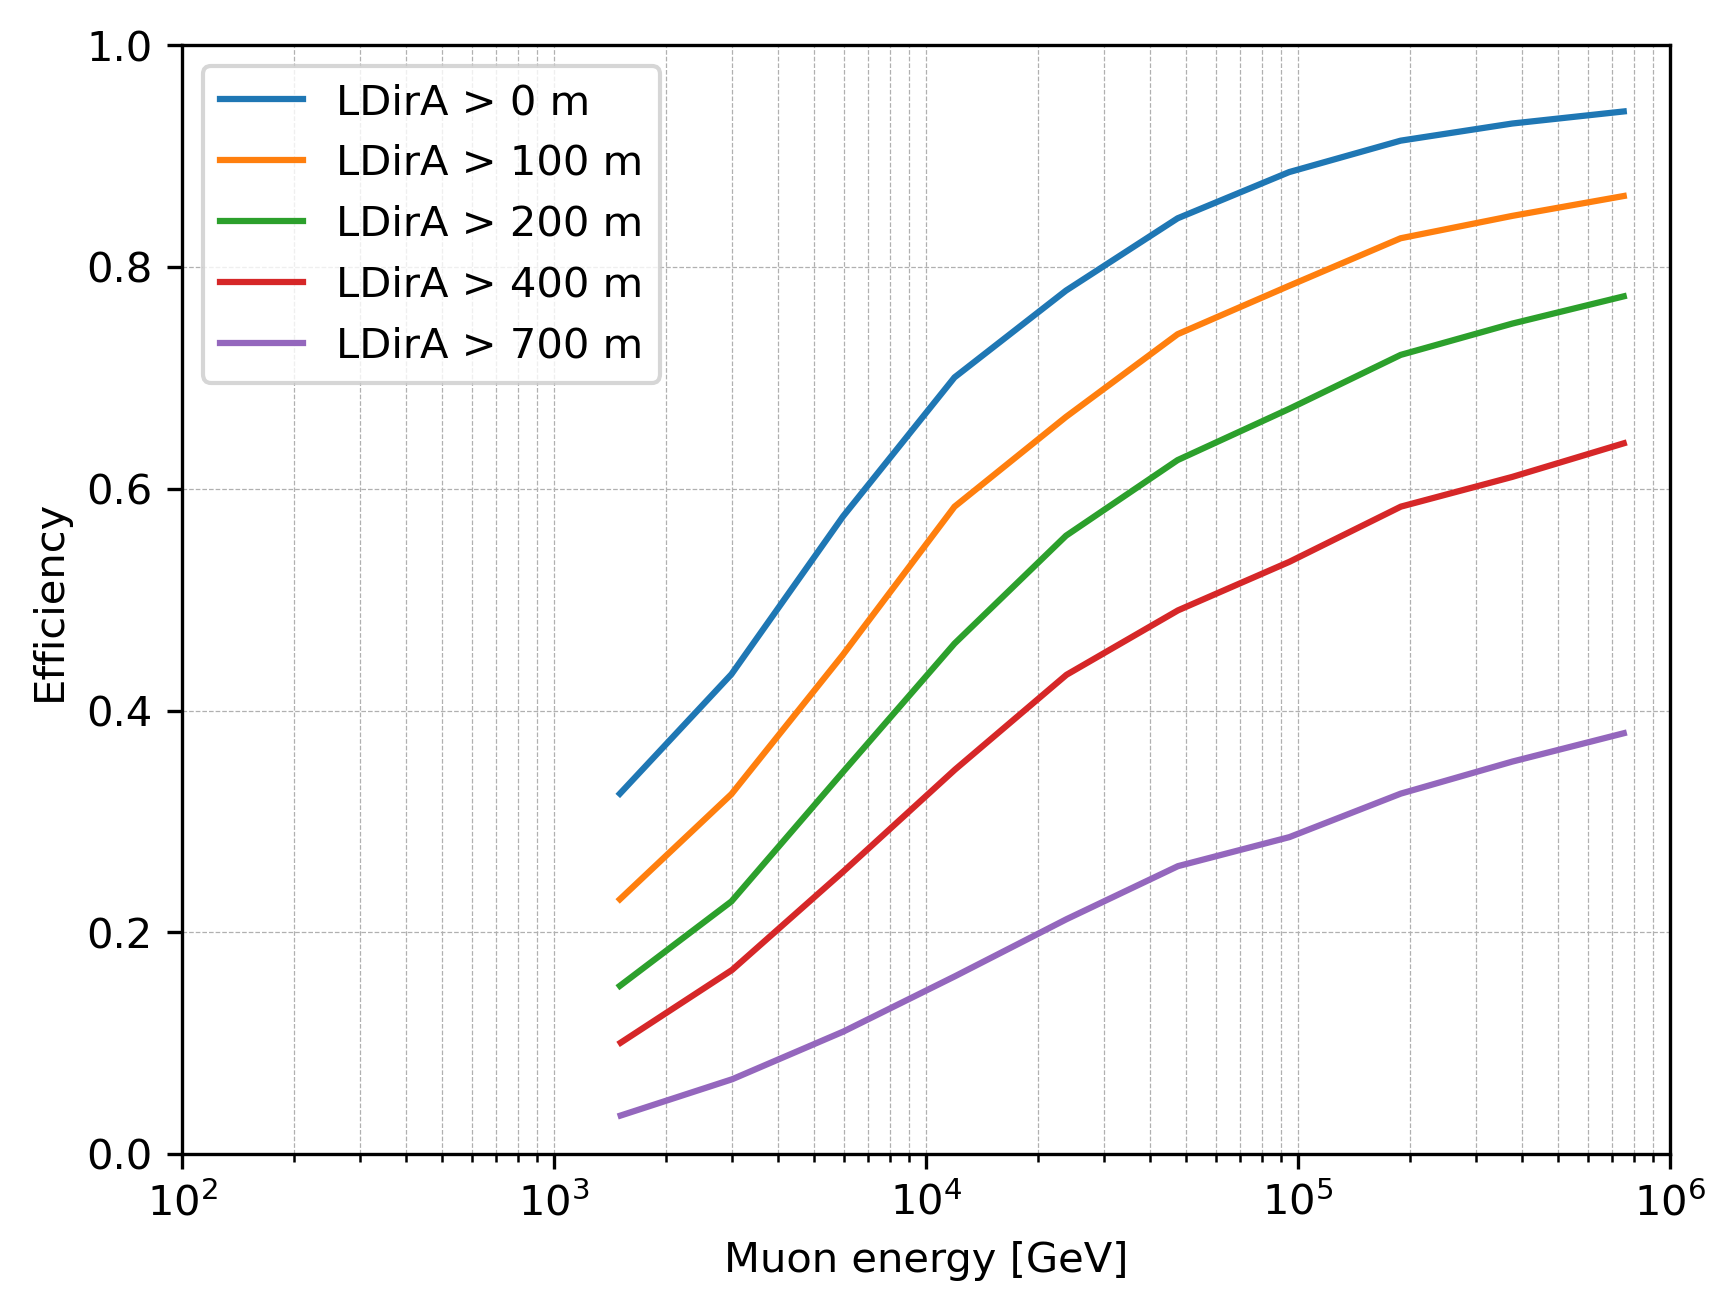

In [32]:
# ----------------------------------------------------------------------

plt.figure(dpi=300)
# Efficiency vs muon energy
for LDir in [0, 100, 200, 400, 700]:
    data = df.loc[(df['dirTrackLengthA_reco'] > LDir)]
    reco_energy = data.muon_energy
    sim_energy = df2.muon_energy
    bin_centers, efficiency = bin_data(
        reco_energy, sim_energy, bins=bins, logspace=True
    )
    print('\n\n')
    plt.plot(bin_centers, efficiency, "-", label=f'LDirA > {LDir} m')
plt.xlabel("Muon energy [GeV]")
plt.ylabel("Efficiency")
plt.ylim(0, 1.0)
plt.xlim(energy_min, energy_max)
plt.xscale("log")
plt.grid(which="both", axis="both", linestyle="--", linewidth=0.3)
plt.legend()
plt.savefig("mmsreco_angular_error_efficiency.png")
plt.show()

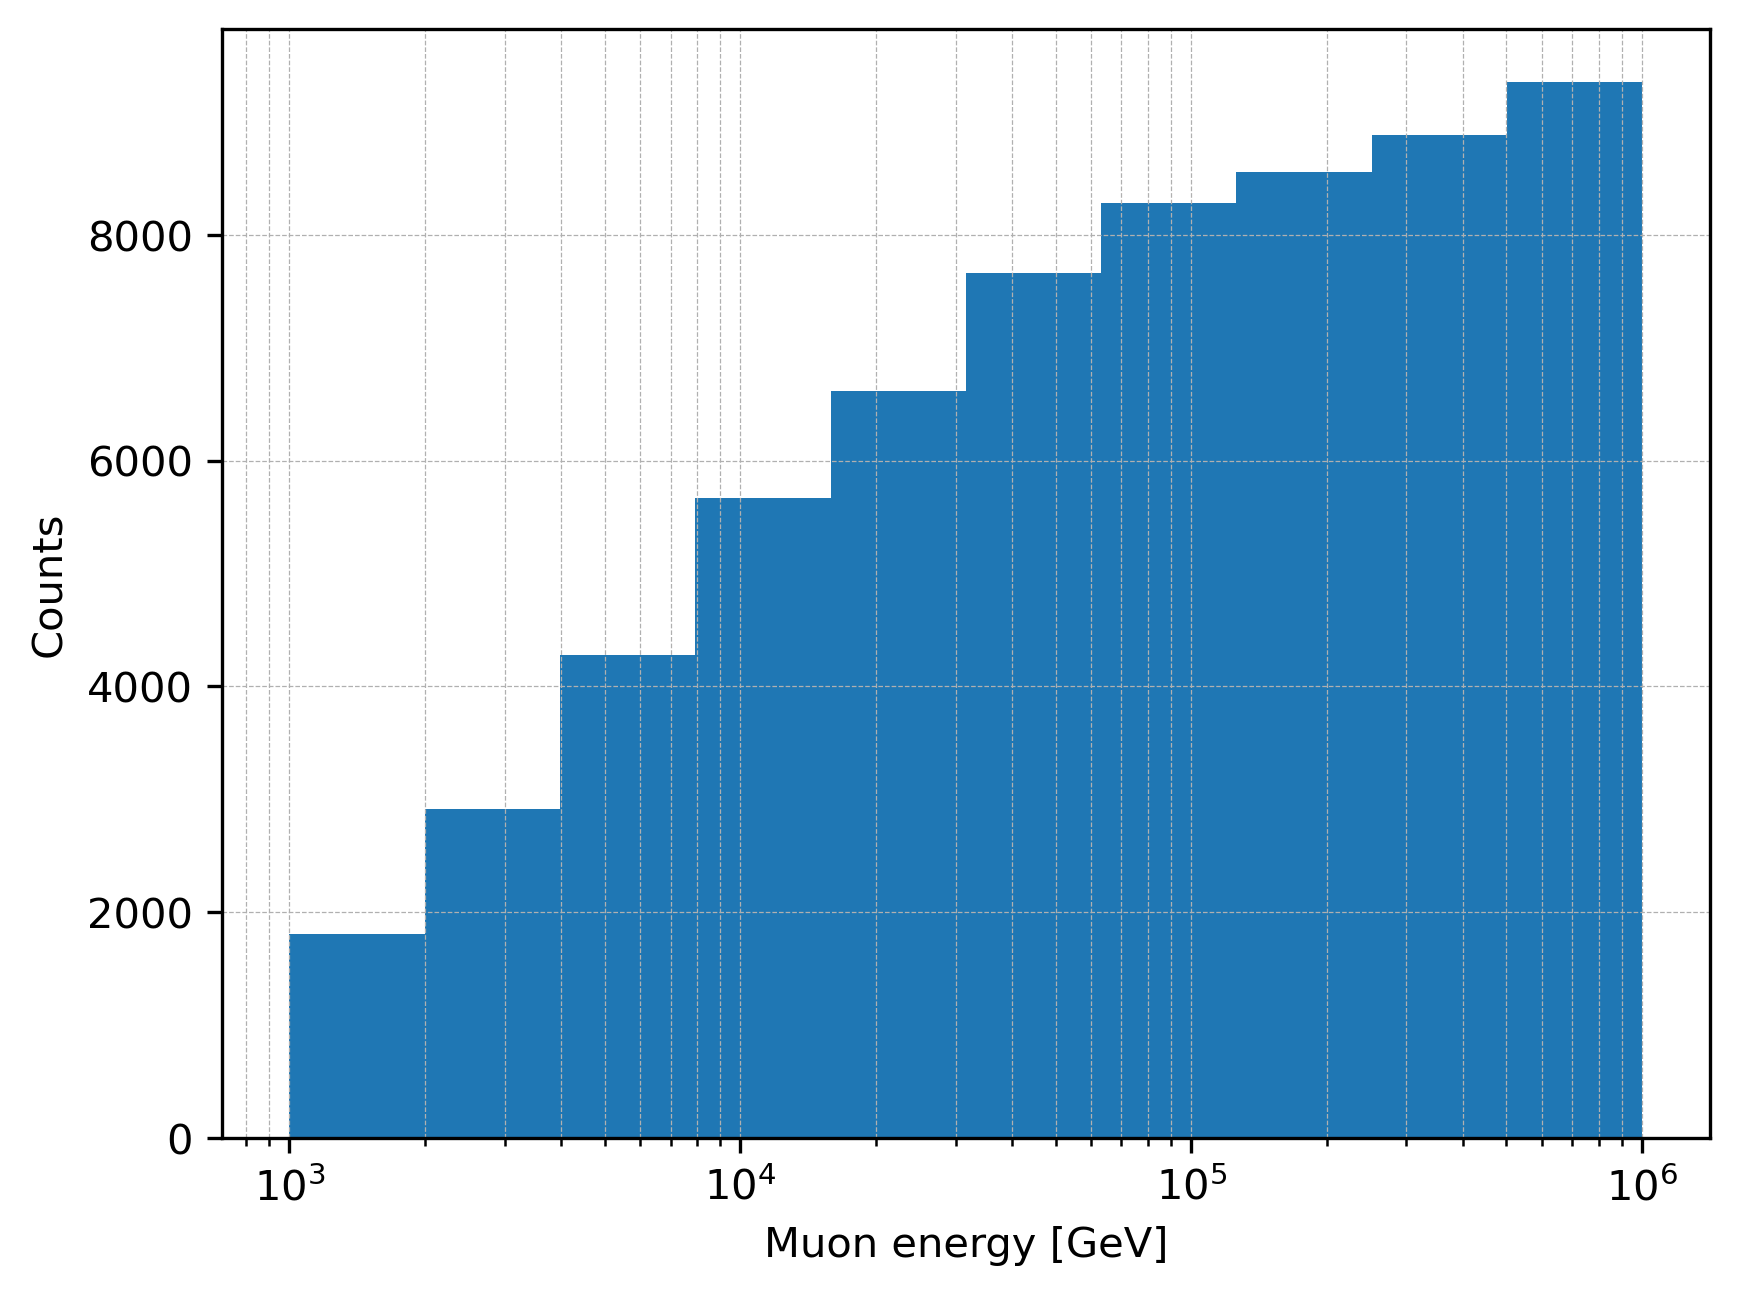

In [36]:
# ----------------------------------------------------------------------

bins = 11
bins = np.logspace(np.log10(np.min(df2.muon_energy)), 
                   np.log10(np.max(df2.muon_energy)), bins)
plt.figure(dpi=300)
plt.hist(df2.muon_energy, bins=bins)
plt.xlabel("Muon energy [GeV]")
plt.ylabel("Counts")
plt.xscale('log')
plt.grid(which="both", axis="both", linestyle="--", linewidth=0.3)
plt.savefig("mmsreco_event_energy_distribution.png")
plt.show()